READ ME

Group Members:Ryan McDonald, Justin Drouin

This jupyter notebook loads the StatLib boston dataset and uses machine learning linear regression in order to create a model to predict median home values based on the boston dataset and certain features. The notebook also creates a model based on the entire feature set rather than an individual feature and shows the calculated weight for each feature and the impact it has on the median home value.


**Experiments**


**1) Use the NumPy load() method to read the dataset. The data contains two arrays: 'features', which contains the variables CRIM through LSTAT, and 'target', which contains the variable MEDV.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
with np.load('boston.npz') as data:
    features = data['features']
    target = data['target']

**2) Set aside the first 102 items (20% of the total) as a validation set, and the remaining 404 items for training.**

In [2]:
features_validation = features[0:102]
target_validation = target[0:102]

features_training = features[102:507]
target_training = target[102:507]

**3) Create a scatterplot of the training data showing the relationship between the number of rooms and the median value of a home. Does the relationship appear to be linear?**

Text(0, 0.5, 'Median value of owner-occupied homes in $1000s')

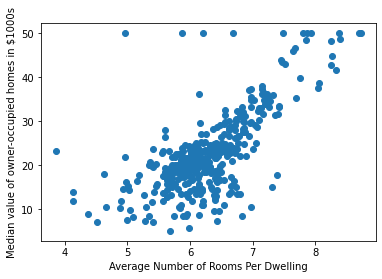

In [3]:
plt.scatter(features_training[:,5], target_training)
plt.xlabel('Average Number of Rooms Per Dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')

The relationship appears to be relatively linear with a few outliers.

**4) With RM as X and MEDV as t, use np.linalg.inv() to compute w for the training set. What is the equation for MEDV as a linear function of RM?**

In [4]:
def find_w(index):
    X = np.vstack((features_training[:,index],np.ones_like(target_training)))
    t = target_training

    XX = np.dot(X,X.T)
    invXX = np.linalg.inv(XX)
    Xt = np.dot(X,t)
    w = np.dot(invXX,Xt)
    w = np.flip(w)
    return w

w_5 = find_w(5)
print(w_5)

[-34.12731481   9.03591206]


MEDV = -34.12731481 + 9.03591206*RM

**5) Use w to add a line representing the least squares fit to your scatter plot from experiment (3). How well does the model appear to fit the training set?**

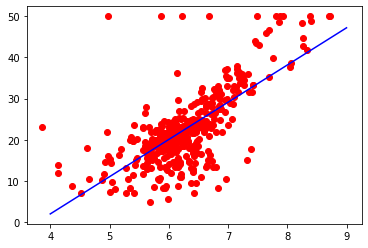

In [5]:
testx = np.linspace(4,9,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w_5)

plt.figure()
plt.plot(features_training[:,5],target_training,'ro')
plt.plot(testx,testt,'b')

It appears that the model fits the training data apart from the outliers of the general trendline.

**6) Use w to find the predicted response for each value of the RM attribute in the training set, then compute the average loss 𝓛 for the model.**

In [6]:
def find_mse_train(w_index, index):
    predicted_response_train = np.empty(404)
    predicted_loss_train = np.empty(404)

    for x in range(len(predicted_response_train)):
        predicted_response_train[x] = w_index[0] + w_index[1]*features_training[x, index]

    for x in range(len(predicted_response_train)):
        predicted_loss_train[x] = (predicted_response_train[x] - target_training[x]) ** 2

    mse_train = np.sum(predicted_loss_train)/(len(predicted_loss_train))
    return mse_train

mse_train_5 = find_mse_train(w_5,5)
print(mse_train_5)

41.05654883138219


**7) Repeat experiment (6) for the validation set. How do the training and validation MSE values compare? What accounts for the difference?**

In [7]:
def find_mse_valid(w_index, index):
    predicted_response_valid = np.empty(102)
    predicted_loss_valid = np.empty(102)

    for x in range(len(predicted_response_valid)):
        predicted_response_valid[x] = w_index[0] + w_index[1]*features_validation[x, index]


    for x in range(len(predicted_response_valid)):
        predicted_loss_valid[x] = (predicted_response_valid[x] - target_validation[x]) ** 2

    mse_valid = np.sum(predicted_loss_valid)/len(predicted_loss_valid)
    return mse_valid

mse_valid_5 = find_mse_valid(w_5,5)
print(mse_valid_5)

53.76787795542337


The validation MSE is higher than the training MSE due to the fact that the model was trained on the training data. Due to this, the prediction should yield a lower error on the data it was trained on than the data that is being used for validation.

**8) Repeat experiments (4), (6), and (7) using all 13 input features as X. How do the training and validation MSEs for this model compare to the values you found for experiment (7)? What accounts for the difference?**

**8-(4)**

In [8]:
X = np.vstack((features_training[:, 12], features_training[:, 11], features_training[:, 10], features_training[:, 9],
              features_training[:, 8], features_training[:, 7], features_training[:, 6], features_training[:, 5],
              features_training[:, 4], features_training[:, 3], features_training[:, 2],features_training[:, 1],
              features_training[:, 0], np.ones_like(target_training)))
t = target_training

XX = np.dot(X, X.T)
invXX = np.linalg.inv(XX)
Xt = np.dot(X, t)
w = np.dot(invXX, Xt)
w = np.flip(w)


**8-(6)**

In [9]:
predicted_response_train = np.empty(404)
predicted_loss_train = np.empty(404)
for x in range(len(predicted_response_train)):
    predicted_response_train[x] = (w[0] + w[1]*features_training[x, 0] + w[2]*features_training[x, 1] + w[3]*features_training[x, 2] + w[4]*features_training[x, 3] + w[5]*features_training[x, 4] + w[6]*features_training[x, 5] + w[7]*features_training[x, 6] + w[8]*features_training[x, 7] + w[9]*features_training[x, 8] + w[10]*features_training[x, 9] + w[11]*features_training[x, 10] + w[12]*features_training[x, 11]+w[13]*features_training[x,12])

for x in range(len(predicted_response_train)):
    predicted_loss_train[x] = (predicted_response_train[x] - target_training[x]) ** 2

mse_train = np.sum(predicted_loss_train)/(len(predicted_loss_train))
print(mse_train)

21.8071995823166


**8-(7)**

In [10]:
predicted_response_valid = np.empty(102)
predicted_loss_valid = np.empty(102)
for x in range(len(predicted_response_valid)):
    predicted_response_valid[x] = (w[0] + w[1]*features_validation[x, 0] + w[2]*features_validation[x, 1] + w[3]*features_validation[x, 2] + w[4]*features_validation[x, 3] + w[5]*features_validation[x, 4] + w[6]*features_validation[x, 5] + w[7]*features_validation[x, 6] + w[8]*features_validation[x, 7] + w[9]*features_validation[x, 8] + w[10]*features_validation[x, 9] + w[11]*features_validation[x, 10] + w[12]*features_validation[x, 11]+w[13]*features_validation[x,12])

for x in range(len(predicted_response_valid)):
    predicted_loss_valid[x] = (predicted_response_valid[x] - target_validation[x]) ** 2

mse_valid = np.sum(predicted_loss_valid)/(len(predicted_loss_valid))
print(mse_valid)

22.863680896367892


As before the MSE of the validation data is higher than that of the MSE of the training data. THe MSE for both the training data and the validation data is much lower than that of the values found in experiment 7. This is due to the fact that our new model takes into account all of the feature variables rather than just one. This allows us to create a more accurate model for prediction. 

**9) Based on the value for w for the new model, how much does a one unit increase in each feature change the median value of the home? Based on the description of the dataset provided by StatLib, convert your answer to dollars.**


In [11]:
total_weights = 0

for x in range(1,14):
    total_weights = total_weights + w[x]
    
print(total_weights)

-12.41870858285515


In our new model, the total value of all of the weights comes out to roughly -12.41871. A one unit increase in each feature would decrease the median value of the home by $12,418.71.

**10) Based on the amount of change in the value of a home, which features are most important?**

In [12]:
for x in range(1,len(w)):
    print("Feature Number %s Weight: %s" % (x,w[x]))

Feature Number 1 Weight: -0.11455286082090232
Feature Number 2 Weight: 0.04489321300929783
Feature Number 3 Weight: 0.028375569758580355
Feature Number 4 Weight: 2.709097418695876
Feature Number 5 Weight: -16.740367150844577
Feature Number 6 Weight: 4.11148209130522
Feature Number 7 Weight: -0.0008479050808878341
Feature Number 8 Weight: -1.3849390491421545
Feature Number 9 Weight: 0.32108456938243535
Feature Number 10 Weight: -0.01224971145800735
Feature Number 11 Weight: -0.9125235000499856
Feature Number 12 Weight: 0.010253363767852686
Feature Number 13 Weight: -0.47841463137789475


By Looking at the data above we can see that the most influential features are feature 4,5,6,8,and 11. **Feature 5** being the most influential feature.

Feature 4, CHAS, is if the house tract bounds the Charles River. This provides an **increase** of roughly $2700 to the median home value of our model. 

Feature 5, NOX, is the nitric ocide concentration (parts per million). Increased nitroc oxide concentration results in a major loss to the median home value of our model, **decreasing**  the price by roughly $16,700 per one unit increase.

Feature 6, RM, is the average number of rooms per dwelling. A one unit increase in the average number of rooms **increases** the value of the home by roughly $4,100.

Feature 8, DIS, is the weighted distances to five Boston employment centres. According to our model, increasing the weighted distance by one **decreases** the median home value by roughly $1400.

Feature 11, PTRATIO, is the pupil-teacher ratio by town. A one unit incrase represents an increased classroom size and  results in a **decrease** of the median home value by roughly $900.